In [2]:
import pandas as pd
import config

df = pd.read_csv(config.WAREHOUSE_PATH+"/items.csv")

df = df.drop(columns="Unnamed: 0")
df = df.rename({'id' : "malID"}, axis=1)
df.reset_index(inplace=True)
def remove_blanks(col):
    return col.str.replace(" ", "")

def remove_double_words(s):
    words = s.split(",")
    half = lambda x: x[:len(x)//2]
    return  ",".join(map(half, words))

def categorical2onehot(column, prefix, rmd=True,):
    column = remove_blanks(column)
    column.fillna("", inplace=True)
    if rmd:
        column = column.apply(remove_double_words)
    one_hot_encoded = column.str.get_dummies(',').astype('int8').add_prefix(prefix, axis=1)
    return one_hot_encoded

df

one_hot_encoded = categorical2onehot(df.genres, "OH_genre_")
df = pd.concat([df, one_hot_encoded], axis=1)
one_hot_encoded = categorical2onehot(df.themes, "OH_theme_")
df = pd.concat([df, one_hot_encoded], axis=1)
one_hot_encoded = categorical2onehot(df.demographic, "OH_dem_")
df = pd.concat([df, one_hot_encoded], axis=1)

df.type = remove_blanks(df.type)

df.to_csv(config.WAREHOUSE_PATH+"/clean_items.csv")


<Axes: >

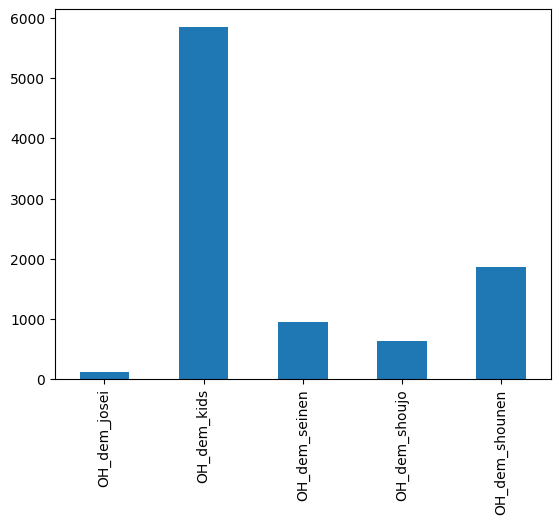

In [96]:
df_genres = df.filter(regex=r"^OH_dem_")
df_genres.sum().plot.bar()